In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

In [2]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.describe(exclude='number')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [8]:
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [9]:
for i in df :
    print(f'Column Name : {i} \n -------------------- \n ')
    print(df[i].unique())

Column Name : Car_Name 
 -------------------- 
 
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Drea

In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
# Creating a new feature called total no. of years old my car.
df['Car_age'] = 2024-df['Year']

df.drop(labels='Year',axis=1,inplace=True)

In [12]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


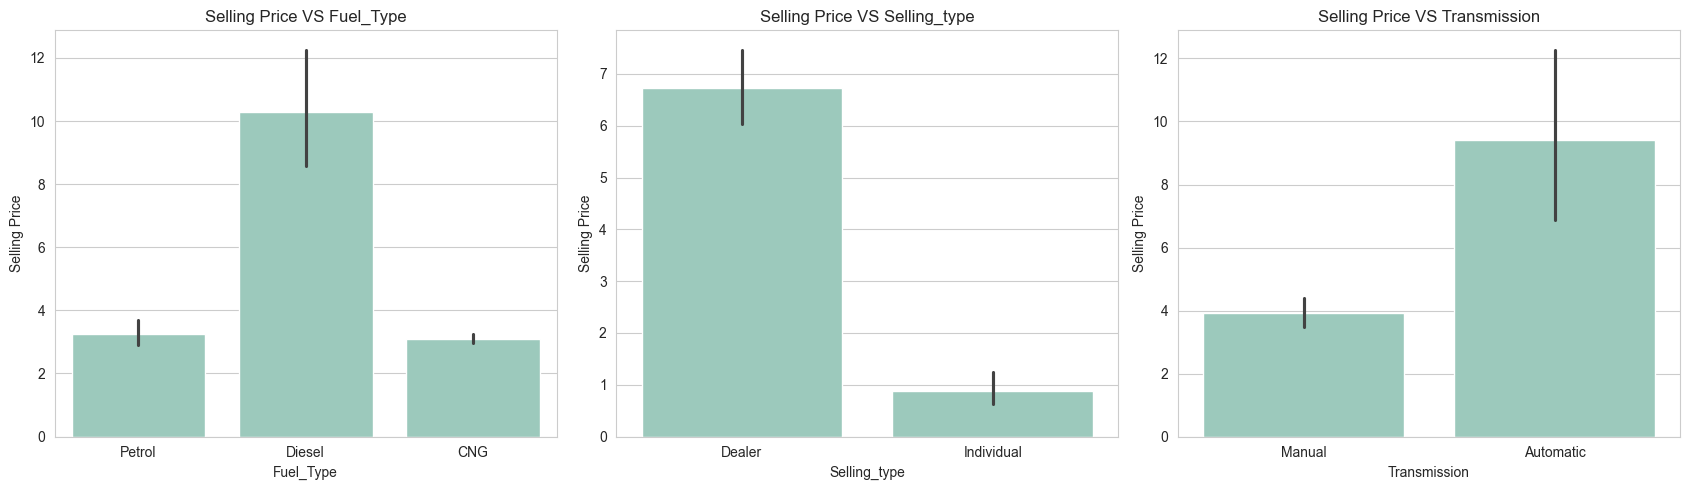

In [13]:
j=1
plt.figure(figsize=(17,5))
for i in df.select_dtypes(exclude=np.number).drop('Car_Name',axis=1):
    plt.subplot(1,3,j)
    sns.barplot(y=df['Selling_Price'],x=df[i])
    plt.ylabel('Selling Price')
    plt.xlabel(i)
    plt.title(f'Selling Price VS {i}')
    plt.tight_layout()
    j+=1

- Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals *
- It can be observed that Selling Price would be higher for cars that are Automatic. *
- Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG *

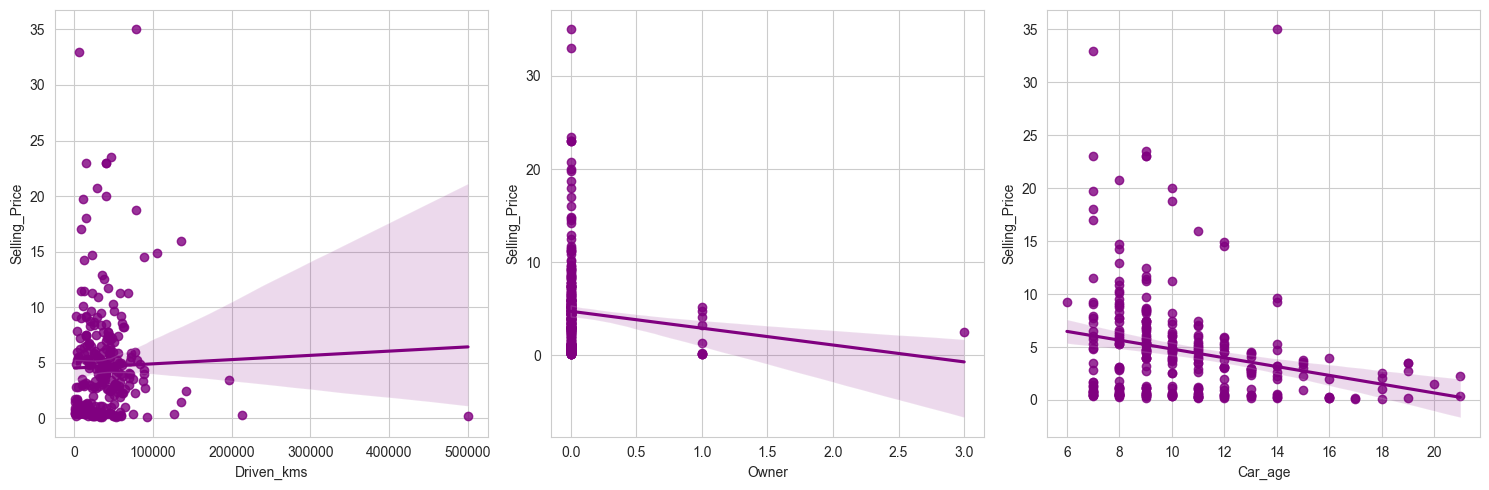

In [14]:
j = 1
plt.figure(figsize=(15,5))
for i in df.select_dtypes(include=np.number).drop(['Selling_Price','Present_Price'],axis=1):
    plt.subplot(1,3,j)
    sns.regplot(x=df[i],y=df['Selling_Price'],color='purple')
    plt.xlabel(i)
    j+=1
    plt.tight_layout()

In [15]:
# In Car Name column There are three hundred and twelve unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
df = df.drop(labels='Car_Name', axis=1)

In [16]:
df

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [17]:
clean_df = pd.get_dummies(df, columns=['Selling_type', 'Transmission', 'Fuel_Type'], drop_first=True)

clean_df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Selling_type_Individual,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,False,True,True,False
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,False,True,True,False


In [18]:
# Convert boolean columns to integers (0 and 1)
bool_columns = ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual']
clean_df[bool_columns] = clean_df[bool_columns].astype(int)

# Use get_dummies for one-hot encoding
clean_df = pd.get_dummies(clean_df, drop_first=True)

clean_df.head()


,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Selling_type_Individual,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,0,1,1,0
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,0,1,1,0


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_df[['Present_Price','Driven_kms','Owner','Car_age','Fuel_Type_Diesel',
                        'Fuel_Type_Petrol','Selling_type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.213866,Present_Price
1,2.884652,Driven_kms
2,1.086551,Owner
3,19.217607,Car_age
4,5.714231,Fuel_Type_Diesel
5,18.487448,Fuel_Type_Petrol
6,2.232469,Selling_type_Individual
7,8.465058,Transmission_Manual


In [20]:
# Car_age nd fuel_type_petrol feature has high VIF
no_multicolinearity = clean_df.drop(['Fuel_Type_Petrol'],axis=1)

In [21]:
# cheking again after removing some correlated feature
variables = clean_df[['Present_Price','Owner','Driven_kms','Fuel_Type_Diesel',
                        'Selling_type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.200856,Present_Price
1,1.065891,Owner
2,1.883550,Driven_kms
3,1.669331,Fuel_Type_Diesel
4,1.748706,Selling_type_Individual
5,2.465837,Transmission_Manual


<Axes: >

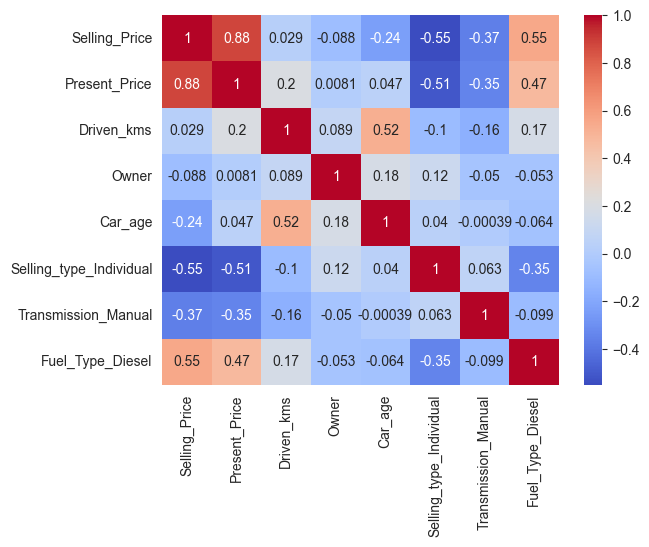

In [22]:
# correlation heat map
sns.heatmap(no_multicolinearity.corr(), annot=True,cmap='coolwarm')

In [23]:
import statsmodels.api as sm
X = no_multicolinearity.drop('Selling_Price',axis=1)
y = no_multicolinearity['Selling_Price']
X = sm.add_constant(X)  # Add a constant term to the independent variables

model = sm.OLS(y, X).fit()  # Ordinary Least Squares (OLS) regression

# Get summary of the regression results
summary = model.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     313.5
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          4.91e-132
Time:                        15:40:47   Log-Likelihood:                -594.09
No. Observations:                 301   AIC:                             1204.
Df Residuals:                     293   BIC:                             1234.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.9657      0.529     13.156      0.000       5.924       8.008
Present_Price               0.4372      0.016     27.360      0.000       0.406       0.469
Driven_kms              -7.057e-06   3.23e-06     -2.186      0.030   -1.34e-05   -7.03e-07
Owner                      -0.6736      0.423     -1.594      0.112      -1.505       0.158
Car_age                    -0.3926      0.043     -9.149      0.000      -0.477      -0.308
Selling_type_Individual    -1.1122      0.256     -4.350      0.000      -1.615      -0.609
Transmission_Manual        -1.4528      0.328     -4.433      0.000      -2.098      -0.808
Fuel_Type_Diesel            1.8711      0.298      6.269      0.000       1.284       2.458
==============================================================================
Omnibus:                       94.557   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              683.833
Skew:                           1.071   Prob(JB):                    3.22e-149
Kurtosis:                      10.066   Cond. No.                     3.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

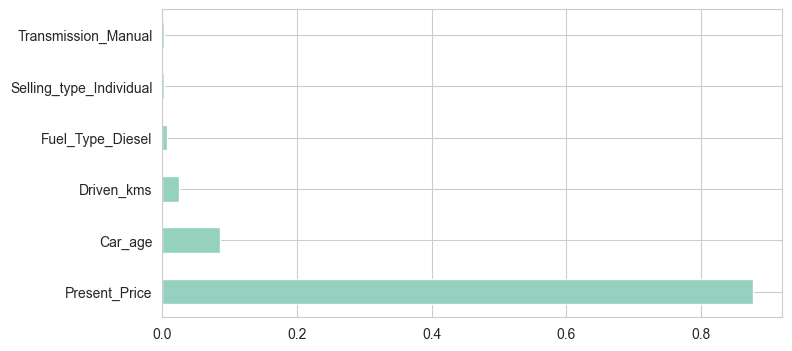

In [25]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[8,4])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [26]:
print(feat_importances.sort_values(ascending=False))

Present_Price              0.876870
Car_age                    0.085606
Driven_kms                 0.025398
Fuel_Type_Diesel           0.006602
Selling_type_Individual    0.002861
Transmission_Manual        0.002365
Owner                      0.000297
const                      0.000000
dtype: float64


In [27]:
final_df=no_multicolinearity

In [28]:
final_df.drop(columns='Owner',inplace=True)

In [29]:
final_df.head()

,Selling_Price,Present_Price,Driven_kms,Car_age,Selling_type_Individual,Transmission_Manual,Fuel_Type_Diesel
0,3.35,5.59,27000,10,0,1,0
1,4.75,9.54,43000,11,0,1,1
2,7.25,9.85,6900,7,0,1,0
3,2.85,4.15,5200,13,0,1,0
4,4.60,6.87,42450,10,0,1,1


In [30]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

In [31]:
# feature scallng on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price','Car_age']])
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])
x_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2, random_state=24)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)

R_squared : 0.8319032884190605
